In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
url = "http://curtis.ml.cmu.edu/datasets/hotpot/hotpot_train_v1.1.json"
df = pd.read_json(url)

# Explorative Data Analysis of the HotpotQA dataset

In [3]:
df.head()

,supporting_facts,level,question,context,answer,_id,type
0,"[[Arthur's Magazine, 0], [First for Women, 0]]",medium,Which magazine was started first Arthur's Maga...,"[[Radio City (Indian radio station), [Radio Ci...",Arthur's Magazine,5a7a06935542990198eaf050,comparison
1,"[[Oberoi family, 0], [The Oberoi Group, 0]]",medium,The Oberoi family is part of a hotel company t...,"[[Ritz-Carlton Jakarta, [The Ritz-Carlton Jaka...",Delhi,5a879ab05542996e4f30887e,bridge
2,"[[Allie Goertz, 0], [Allie Goertz, 1], [Allie ...",hard,Musician and satirist Allie Goertz wrote a son...,"[[Lisa Simpson, [Lisa Marie Simpson is a ficti...",President Richard Nixon,5a8d7341554299441c6b9fe5,bridge
3,"[[Peggy Seeger, 0], [Peggy Seeger, 1], [Ewan M...",medium,What nationality was James Henry Miller's wife?,"[[Moloch: or, This Gentile World, [Moloch: or,...",American,5a82171f5542990a1d231f4a,bridge
4,"[[Cadmium chloride, 1], [Ethanol, 0]]",medium,Cadmium Chloride is slightly soluble in this c...,"[[Cadmium chloride, [Cadmium chloride is a whi...",alcohol,5a84dd955542997b5ce3ff79,bridge


In [7]:
entry = df.iloc[0]
entry

supporting_facts       [[Arthur's Magazine, 0], [First for Women, 0]]
level                                                          medium
question            Which magazine was started first Arthur's Maga...
context             [[Radio City (Indian radio station), [Radio Ci...
answer                                              Arthur's Magazine
_id                                          5a7a06935542990198eaf050
type                                                       comparison
Name: 0, dtype: object

In [8]:
df['type'].value_counts()

type
bridge        72991
comparison    17456
Name: count, dtype: int64

In [9]:
df['level'].value_counts()

level
medium    56814
easy      17972
hard      15661
Name: count, dtype: int64

<Axes: title={'center': 'Length of the question'}>

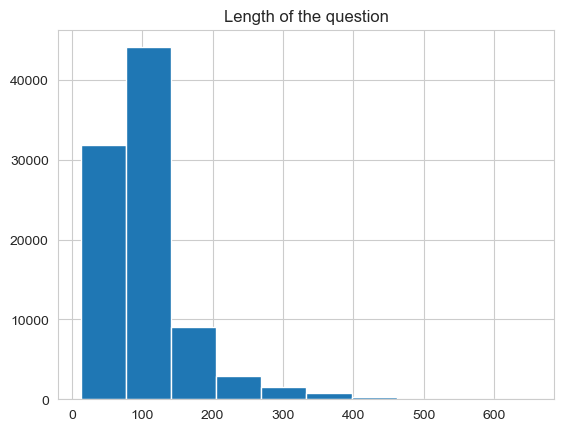

In [41]:
plt.title("Length of the question")
df['question'].str.len().hist()

In [37]:
context_processed_column = []
for entry in df['context']:
    context_merged = []
    for context in entry:
        context_merged.append(" ".join(context[1]))
    context_processed_column.append(" ".join(context_merged))

df['context_processed'] = context_processed_column

<Axes: title={'center': 'Length of the context'}>

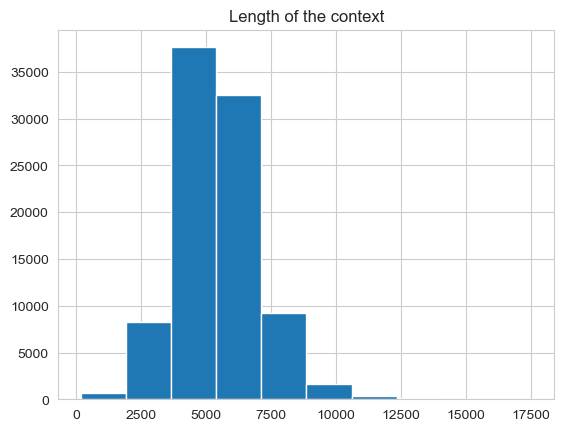

In [42]:
plt.title("Length of the context")
df['context_processed'].str.len().hist()

<Axes: title={'center': 'Length of the supporting facts'}>

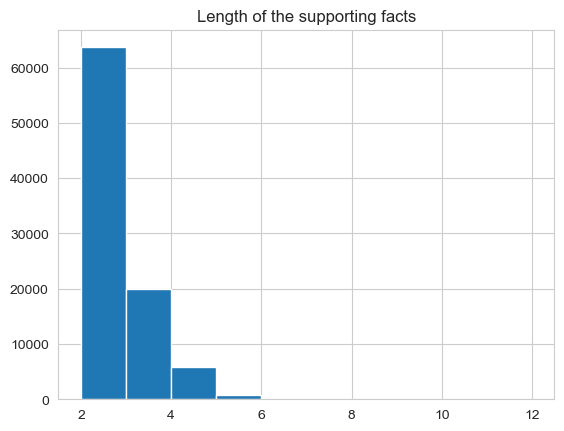

In [44]:
plt.title("Length of the supporting facts")
df['supporting_facts'].str.len().hist()

In [47]:
# Save the processed dataframe to a parquet file
df = df[['_id', 'type', 'level', 'question', 'answer', 'context_processed']]
df.to_parquet("data/hotpot_processed.parquet")